## Seleção e preparação

### Importando bibliotecas e dataset

In [10]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [24]:
df = pd.read_csv('./datasets/health_data.csv', na_values=[' ', '_'])

### Limpando e conferindo dados

In [25]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)
df['age'] = (df['age'] / 365).astype(int)

df = df[df['ap_hi'] <= 180]
df = df[df['ap_lo'] <= 120]
df = df[df['height'] >= 130]
df = df[df['weight'] >= 30]

In [31]:
df.duplicated().sum()

3208

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.count()

age            65349
gender         65349
height         65349
weight         65349
ap_hi          65349
ap_lo          65349
cholesterol    65349
gluc           65349
smoke          65349
alco           65349
active         65349
cardio         65349
dtype: int64

In [38]:
print(df.isna().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65349 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          65349 non-null  int32  
 1   gender       65349 non-null  int64  
 2   height       65349 non-null  float64
 3   weight       65349 non-null  float64
 4   ap_hi        65349 non-null  float64
 5   ap_lo        65349 non-null  float64
 6   cholesterol  65349 non-null  int64  
 7   gluc         65349 non-null  int64  
 8   smoke        65349 non-null  int64  
 9   alco         65349 non-null  int64  
 10  active       65349 non-null  int64  
 11  cardio       65349 non-null  int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 6.2 MB


### Normalizando

In [40]:
def minMax(col):
    return round((col - col.min()) / (col.max() - col.min()), 2)

cols = ['height', 'weight', 'ap_hi', 'ap_lo']

df.update(df[cols].apply(minMax))

### Gráficos

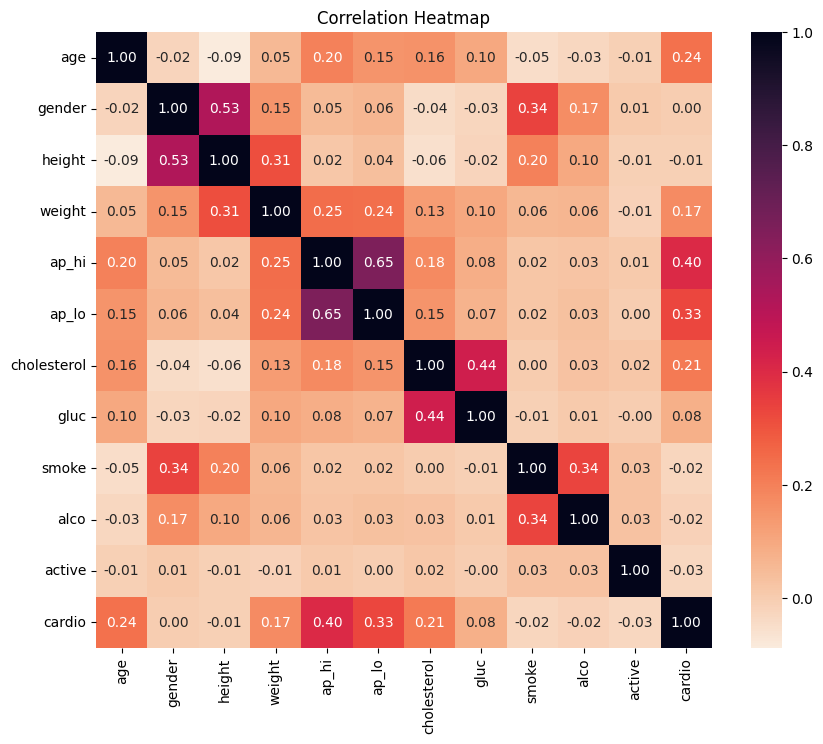

In [41]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), square=True, annot=True, cmap=sns.cm.rocket_r, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()